<a href="https://colab.research.google.com/github/mahdiSheykhiGithub/FAKE-NEWS/blob/main/TfidfVectorizer_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Load Data

In [1]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fake NEWS/news.csv')

# preprocessing

In [4]:
data.drop(['title', 'Unnamed: 0'], axis=1, inplace=True)
data

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL
...,...,...
6330,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [5]:
data

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL
...,...,...
6330,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [6]:
data['text'][0]

'Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that the entir

In [7]:
def text_cleaner(text):
  punc = list(string.punctuation)
  stop = stopwords.words('english')
  bad_tokens = punc + stop
  lemma = WordNetLemmatizer()

  tokens = word_tokenize(text)
  word_tokens = [t for t in tokens if t.isalpha()]
  clean_tokens = [lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens]
  return " ".join(clean_tokens)

In [8]:
data['text'] = data['text'].apply(text_cleaner)
data.head()

,text,label
0,daniel greenfield shillman journalism fellow f...,FAKE
1,google pinterest digg linkedin reddit stumbleu...,FAKE
2,secretary state john kerry said monday stop pa...,REAL
3,kaydee king kaydeeking november the lesson ton...,FAKE
4,it primary day new york hillary clinton donald...,REAL


# TfidfVectorizer_LogisticRegression

In [45]:
X = data['text']
y = data['label']

In [46]:
vectorizer = TfidfVectorizer(min_df = 5)
X = vectorizer.fit_transform(X)

In [47]:
X.shape

(6335, 20185)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [49]:
print(f'Train shape : {X_train.shape}')
print(f'Test shape : {X_test.shape}')

Train shape : (5068, 20185)
Test shape : (1267, 20185)


In [50]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

# Evaluation

In [51]:
print(f'Test Score : {lr.score(X_test, y_test)}')
print(f'Train Score : {lr.score(X_train, y_train)}')

Test Score : 0.9210734017363852
Train Score : 0.9536306235201263


In [52]:
y_pred = lr.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

        FAKE       0.95      0.90      0.92       669
        REAL       0.89      0.95      0.92       598

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



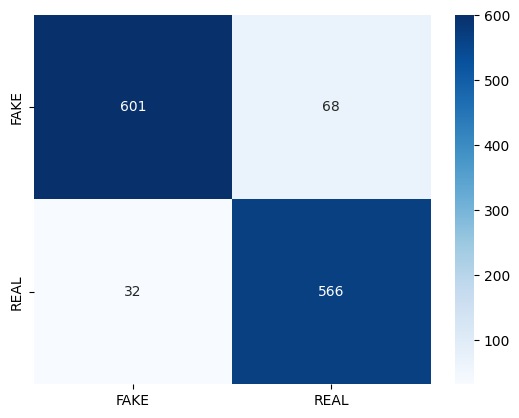

In [53]:
conf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['FAKE', 'REAL'],
    yticklabels=['FAKE', 'REAL']
    )
plt.show()